In [1]:
from datasets import load_dataset
from datasets import Dataset
dataset = load_dataset('ag_news')
train_ds = dataset['train'].shuffle(seed=42).select([i for i in list(range(5000))])
validation_test_ds = dataset['test'].shuffle(seed=42).select([i for i in list(range(1000))])
validation_ds = Dataset.from_dict(validation_test_ds[0:500])
test_ds = Dataset.from_dict(validation_test_ds[500:1000])

C:\Users\DELL\anaconda3\envs\ta\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using custom data configuration default
Reusing dataset ag_news (C:\Users\DELL\.cache\huggingface\datasets\ag_news\default\0.0.0\bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13.56it/s]
Loading cached shuffled indices for dataset at C:\Users\DELL\.cache\huggingface\datasets\ag_news\default\0.0.0\bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548\cache-dd0ff9596fea92b0.arrow
Loading cached shuffled indices for dataset at C:\Users\DELL\.cache\huggingface\datasets\ag_news\default\0.0.0\bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548\cache-12f3c4e4bf422cce.arrow


In [2]:
display(train_ds[0:5])

{'text': ['Bangladesh paralysed by strikes Opposition activists have brought many towns and cities in Bangladesh to a halt, the day after 18 people died in explosions at a political rally.',
  'Desiring Stability Redskins coach Joe Gibbs expects few major personnel changes in the offseason and wants to instill a culture of stability in Washington.',
  'Will Putin #39;s Power Play Make Russia Safer? Outwardly, Russia has not changed since the barrage of terrorist attacks that culminated in the school massacre in Beslan on Sept.',
  'U2 pitches for Apple New iTunes ads airing during baseball games Tuesday will feature the advertising-shy Irish rockers.',
  'S African TV in beheading blunder Public broadcaster SABC apologises after news bulletin shows footage of American beheaded in Iraq.'],
 'label': [0, 1, 0, 3, 0]}

In [3]:
display(validation_ds[0:5])

{'text': ['Indian board plans own telecast of Australia series The Indian cricket board said on Wednesday it was making arrangements on its own to broadcast next month #39;s test series against Australia, which is under threat because of a raging TV rights dispute.',
  'Stocks Higher on Drop in Jobless Claims A sharp drop in initial unemployment claims and bullish forecasts from Nokia and Texas Instruments sent stocks slightly higher in early trading Thursday.',
  'Nuggets 112, Raptors 106 Carmelo Anthony scored 30 points and Kenyon Martin added 24 points and 16 rebounds, helping the Denver Nuggets hold off the Toronto Raptors 112-106 Wednesday night.',
  'Stocks Higher on Drop in Jobless Claims A sharp drop in initial unemployment claims and bullish forecasts from Nokia and Texas Instruments sent stocks higher in early trading Thursday.',
  'REVIEW: \'Half-Life 2\' a Tech Masterpiece (AP) AP - It\'s been six years since Valve Corp. perfected the first-person shooter with "Half-Life." 

In [4]:
display(test_ds[0:5])

{'text': ['A Sneak Peek at Trillian 3.0 Instant Messaging The popular IM consolidation service adds audio and video chat.',
  'New Technology Powers Fuel Cells A new fuel cell for notebook PCs, more compact and powerful than competing technologies, could be on the market in early 2006 at a price of around \\$90, its Japanese inventors claim.',
  "Court rules against state Web-blocking law A Pennsylvania law requiring Internet service providers to block Web sites deemed by the state's prosecuting attorneys to be child pornography has been reversed by a U.S. federal court on free-speech grounds.",
  'Braves, Smoltz agree to new deal Atlanta, GA (Sports Network) - The Atlanta Braves announced Thursday that the team has come to terms with longtime pitcher John Smoltz to a new two-year contract with a club option for the 2007 season.',
  "US Supreme Court asked to rule on homosexuals' right to adopt children (AFP) AFP - The American Civil Liberties Union, the leading US civil rights group, 

In [5]:
#defining model:
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          Trainer, EarlyStoppingCallback,
                          TrainingArguments)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenize_func = lambda sentences: tokenizer(sentences['text'], 
                                            padding='max_length', truncation=True, max_length = 200)



train_dataset = train_ds.map(tokenize_func, batched=True)
val_dataset = validation_ds.map(tokenize_func, batched=True)
test_dataset = test_ds.map(tokenize_func, batched=True)



Loading cached processed dataset at C:\Users\DELL\.cache\huggingface\datasets\ag_news\default\0.0.0\bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548\cache-81a0115384c8d46a.arrow
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.93ba/s]


In [6]:
original_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\AG-News\original_model'
antipode3_run1_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\AG-News\antipode3\run1'
antipode3_run2_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\AG-News\antipode3\run2'
antipode3_run3_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\AG-News\antipode3\run3'


original_model = AutoModelForSequenceClassification.from_pretrained(original_model_path, num_labels=4)
antipode3_run1_model = AutoModelForSequenceClassification.from_pretrained(antipode3_run1_model_path, num_labels=4)
antipode3_run2_model = AutoModelForSequenceClassification.from_pretrained(antipode3_run2_model_path, num_labels=4)
antipode3_run3_model = AutoModelForSequenceClassification.from_pretrained(antipode3_run3_model_path, num_labels=4)

In [7]:
import numpy as np
from datasets import load_metric
 
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
  
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels, average='macro')["f1"]
   return {"accuracy": accuracy, "f1": f1}
    
training_args = TrainingArguments(
    output_dir=r'C:\Users\DELL\Text_Augmentation\ag_news_dataset_3runs\models\original_model',          # output directory
    num_train_epochs=20,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.1,               # strength of weight decay
    
    logging_dir=r'C:\Users\DELL\Text_Augmentation\ag_news_dataset_3runs\logs\original_model',            # directory for storing logs
    save_total_limit = 1,
    load_best_model_at_end=True,
    #metric_for_best_model='f1',
    evaluation_strategy='epoch',
    logging_strategy='epoch',
    save_strategy='epoch',
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
)


original_model_trainer = Trainer(
    model=original_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


antipode3_run1_model_trainer = Trainer(
    model=antipode3_run1_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

antipode3_run2_model_trainer = Trainer(
    model=antipode3_run2_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

antipode3_run3_model_trainer = Trainer(
    model=antipode3_run3_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [8]:
#evaluate:
original_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.3214978575706482,
 'eval_accuracy': 0.9,
 'eval_f1': 0.8979683758897417,
 'eval_runtime': 7.0808,
 'eval_samples_per_second': 70.614,
 'eval_steps_per_second': 2.26}

In [9]:
#evaluate:
antipode3_run1_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.2529250979423523,
 'eval_accuracy': 0.924,
 'eval_f1': 0.9226954120198172,
 'eval_runtime': 3.6037,
 'eval_samples_per_second': 138.745,
 'eval_steps_per_second': 4.44}

In [10]:
#evaluate:
antipode3_run2_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.2599030137062073,
 'eval_accuracy': 0.918,
 'eval_f1': 0.9162300455324902,
 'eval_runtime': 3.4434,
 'eval_samples_per_second': 145.207,
 'eval_steps_per_second': 4.647}

In [11]:
#evaluate:
antipode3_run3_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.25937554240226746,
 'eval_accuracy': 0.914,
 'eval_f1': 0.9122981397774937,
 'eval_runtime': 3.7837,
 'eval_samples_per_second': 132.145,
 'eval_steps_per_second': 4.229}

In [12]:
original_model_preds_output = original_model_trainer.predict(test_dataset)
antipode3_run1_model_preds_output = antipode3_run1_model_trainer.predict(test_dataset)
antipode3_run2_model_preds_output = antipode3_run2_model_trainer.predict(test_dataset)
antipode3_run3_model_preds_output = antipode3_run3_model_trainer.predict(test_dataset)


The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32
The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32
The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 3

In [13]:
original_model_trainer.predict(test_dataset)


The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-1.0904486 , -1.4495085 , -0.67217946,  3.6977246 ],
       [-1.210511  , -1.6686294 , -0.20451044,  3.7336228 ],
       [-0.8411143 , -1.4815652 , -0.64784205,  3.5098298 ],
       ...,
       [-0.53783953,  3.7985022 , -1.6240501 , -1.3872039 ],
       [ 3.2758691 , -1.5479149 , -1.051977  , -1.222659  ],
       [-1.696101  , -1.961721  ,  2.7966197 ,  1.31433   ]],
      dtype=float32), label_ids=array([3, 3, 3, 1, 0, 1, 1, 0, 1, 3, 3, 0, 3, 1, 3, 1, 0, 0, 3, 3, 1, 2,
       0, 1, 3, 2, 0, 0, 0, 0, 0, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 3, 1, 2,
       3, 0, 2, 3, 2, 1, 2, 0, 3, 1, 3, 3, 0, 2, 0, 2, 0, 0, 3, 1, 1, 3,
       0, 3, 0, 0, 1, 1, 0, 2, 1, 2, 3, 1, 3, 3, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 3, 1, 2, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 1, 0, 1, 3, 2, 3, 1, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 3, 1, 3, 2, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 2, 3, 1, 0, 0, 1, 1, 1, 1, 3, 0, 3, 2, 0,
       3, 2, 1, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 

In [14]:
antipode3_run1_model_trainer.predict(test_dataset)


The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-0.91651213, -1.6062776 , -0.72122216,  3.6683104 ],
       [-0.9536576 , -2.3065436 ,  0.6941371 ,  3.0622356 ],
       [-0.24791223, -1.7687477 , -0.71254355,  3.10679   ],
       ...,
       [ 0.65684086,  2.6842613 , -1.8074836 , -1.6462694 ],
       [ 3.7298727 , -1.6854795 , -1.2422985 , -1.4991305 ],
       [-1.0799507 , -2.4294307 ,  2.20671   ,  1.6721332 ]],
      dtype=float32), label_ids=array([3, 3, 3, 1, 0, 1, 1, 0, 1, 3, 3, 0, 3, 1, 3, 1, 0, 0, 3, 3, 1, 2,
       0, 1, 3, 2, 0, 0, 0, 0, 0, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 3, 1, 2,
       3, 0, 2, 3, 2, 1, 2, 0, 3, 1, 3, 3, 0, 2, 0, 2, 0, 0, 3, 1, 1, 3,
       0, 3, 0, 0, 1, 1, 0, 2, 1, 2, 3, 1, 3, 3, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 3, 1, 2, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 1, 0, 1, 3, 2, 3, 1, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 3, 1, 3, 2, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 2, 3, 1, 0, 0, 1, 1, 1, 1, 3, 0, 3, 2, 0,
       3, 2, 1, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 

In [15]:
antipode3_run2_model_trainer.predict(test_dataset)


The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-0.91537017, -1.5856478 , -0.67157775,  3.6013718 ],
       [-0.8586465 , -2.2780771 ,  0.65840095,  3.0021741 ],
       [-0.31517142, -1.6889474 , -0.71033704,  3.0976863 ],
       ...,
       [ 0.51803106,  2.7925806 , -1.7423592 , -1.6183997 ],
       [ 3.6701097 , -1.7217851 , -1.1839767 , -1.4377179 ],
       [-0.99368024, -2.2740657 ,  1.8088095 ,  1.8301091 ]],
      dtype=float32), label_ids=array([3, 3, 3, 1, 0, 1, 1, 0, 1, 3, 3, 0, 3, 1, 3, 1, 0, 0, 3, 3, 1, 2,
       0, 1, 3, 2, 0, 0, 0, 0, 0, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 3, 1, 2,
       3, 0, 2, 3, 2, 1, 2, 0, 3, 1, 3, 3, 0, 2, 0, 2, 0, 0, 3, 1, 1, 3,
       0, 3, 0, 0, 1, 1, 0, 2, 1, 2, 3, 1, 3, 3, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 3, 1, 2, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 1, 0, 1, 3, 2, 3, 1, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 3, 1, 3, 2, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 2, 3, 1, 0, 0, 1, 1, 1, 1, 3, 0, 3, 2, 0,
       3, 2, 1, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 

In [16]:
antipode3_run3_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-0.89051765, -1.5889986 , -0.6793604 ,  3.6051886 ],
       [-0.8107565 , -2.1143506 ,  0.10751715,  3.3744464 ],
       [-0.324861  , -1.7359672 , -0.707011  ,  3.176363  ],
       ...,
       [ 0.38710782,  2.9010797 , -1.7845957 , -1.5840793 ],
       [ 3.6734567 , -1.7621962 , -1.2378892 , -1.3514704 ],
       [-0.909641  , -2.3422322 ,  1.7208083 ,  1.9402184 ]],
      dtype=float32), label_ids=array([3, 3, 3, 1, 0, 1, 1, 0, 1, 3, 3, 0, 3, 1, 3, 1, 0, 0, 3, 3, 1, 2,
       0, 1, 3, 2, 0, 0, 0, 0, 0, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 3, 1, 2,
       3, 0, 2, 3, 2, 1, 2, 0, 3, 1, 3, 3, 0, 2, 0, 2, 0, 0, 3, 1, 1, 3,
       0, 3, 0, 0, 1, 1, 0, 2, 1, 2, 3, 1, 3, 3, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 3, 1, 2, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 1, 0, 1, 3, 2, 3, 1, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 3, 1, 3, 2, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 2, 3, 1, 0, 0, 1, 1, 1, 1, 3, 0, 3, 2, 0,
       3, 2, 1, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 

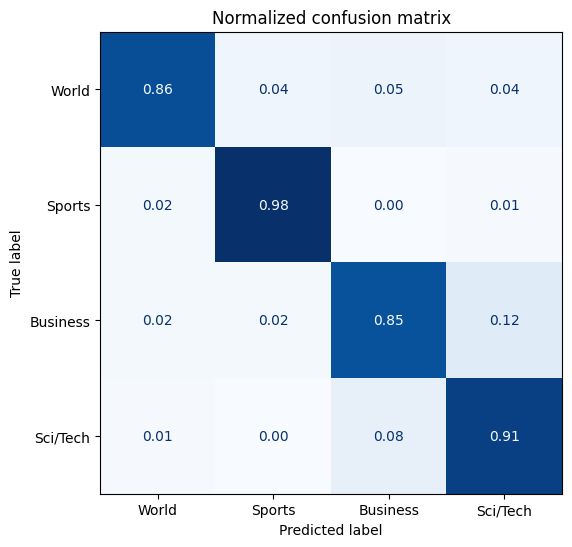

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(original_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = train_dataset.features["label"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

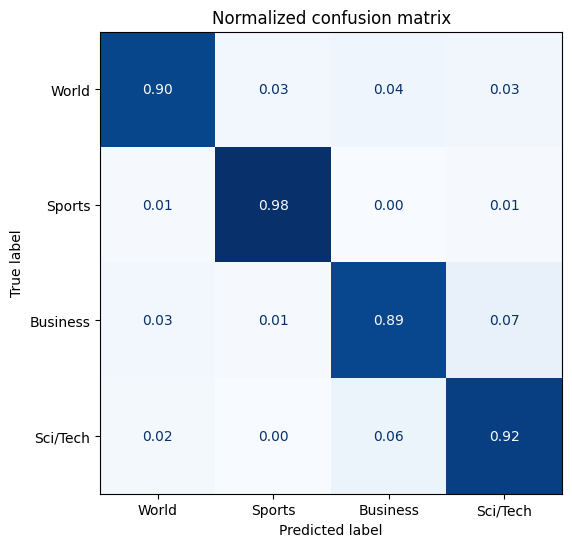

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antipode3_run1_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = train_dataset.features["label"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

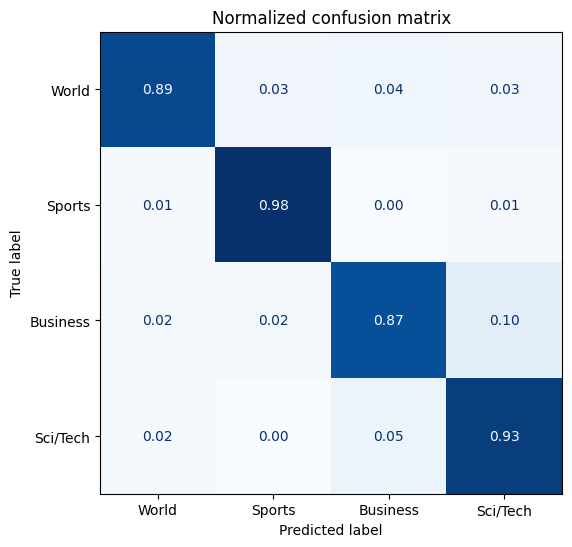

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antipode3_run2_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = train_dataset.features["label"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

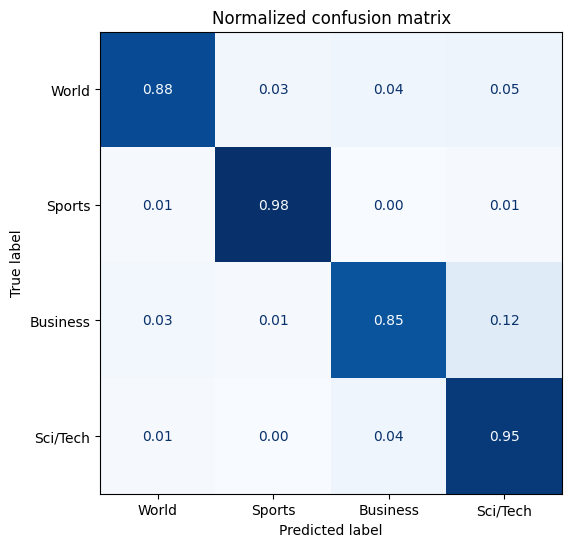

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antipode3_run3_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = train_dataset.features["label"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)